# Introdução a regressão linear



## Covariância e Coeficiente de correlação
Em probabilidade, a covariância de duas variáveis $X$ e $Y$ é uma medida da variabilidade conjunta destas variáveis aleatórias. Se as variáveis tem covariância positiva tendem a mostrar um comportamento semelhante, ou seja, os menores(maiores) valores da variável $X$ corresponde aos menores(maiores) da variável $Y$ . Se a covariância é negativa então as variáveis tendem a mostrar um comportamento oposto, ou seja, os menores(maiores) valores da variável $X$ corresponde aos maiores(menores) da variável $Y$.

Assim, podemos ver que o sinal da covariância mostra a tendência na relação linear entre as variáveis.

A magnitude da covariância não é fácil de interpretar. A versão normalizada da covariância (coeficiente de correlação) entretanto, mostra por sua magnitude a força da relação linear. Assim, agora $X$ e $Y$ sejam variáveis aleatórias integráveis, com variâncias positivas e finitas. Dizemos que a variável aleatória $ \displaystyle \frac{X-\mathbb{E}(X)}{\sigma_X} $ é uma padronização de $X$, pois expressa o valor de $X$ em unidades padronizadas (desvio padrão). Um variável aleatória padronizada possuí esperança zero e variância 1.

A covariância padronizada, chama-se coeficiente de correlação entre $X$ e $Y$, o qual denotaremos por $ \rho(X,Y) $.

Para exemplificar o cálculo e interpretação do coeficiente de correlação, utilizaremos o arquivo ```exemplo_regressao.csv```.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dados/exemplo_regressao.csv')
df.head()

,y1,y2,y3,x
0,-2.065365,12.248989,-0.579265,0.00000
1,-2.705052,13.136135,-3.393978,0.10101
2,2.087234,9.768663,-0.890520,0.20202
3,-1.250615,9.191904,3.880306,0.30303
4,-0.624902,7.381492,1.905197,0.40404


No arquivo, temos quatro colunas presentando os valores de quatro variáveis ($y_1, y_2, y_3, x$). Para calcular o coeficiente de correlação de todos os pares, utilzamos o comando ```DataFrame.corr()```. O resultado obtido é chamado de matriz de correlações.

In [2]:
df.corr()

,y1,y2,y3,x
y1,1.000000,-0.893617,-0.078731,0.938232
y2,-0.893617,1.000000,0.072448,-0.969482
y3,-0.078731,0.072448,1.000000,-0.082471
x,0.938232,-0.969482,-0.082471,1.000000


Analizando a matriz de correlação, observamos que existe relação positiva entre as variáveis $x$ e $y_1$, indicando que o crescimento de $x$ implica no crescimento de $y_1$. Entre as varriáveis $x$ e $y_2$, existe uma relação negativa, indicando que o crescimento de $x$ implica no decrescimento de $y_2$. Por fim, temos uma relação próxima de zero entre as variáveis $x$ e $y_3$, indicando que as duas variáveis não possuem comportamento dependente. Podemos ainda concluir que o crecimento de $y_1$ implica no decrescimento de $y_2$, uma vez que o coeficiente de correlação correspondente possui valor próximo de -1.

Para visualizar as relações identificadas com o coeficiente de correlação, faremos a plotagem dos gráficos de dispersão.

Text(0, 0.5, 'y3')

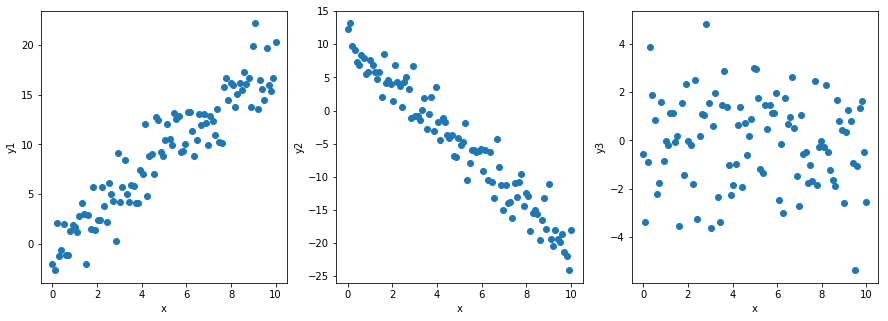

In [3]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(df.x, df.y1)
plt.xlabel('x')
plt.ylabel('y1')
plt.subplot(132)
plt.scatter(df.x, df.y2)
plt.xlabel('x')
plt.ylabel('y2')
plt.subplot(133)
plt.scatter(df.x, df.y3)
plt.xlabel('x')
plt.ylabel('y3')

O primeiro gráfico representa a relação entre $x$ e $y_1$. O comportamento linear crescente confirma a conclusão feita a partir do coeficiente de correlação. Para $x$ e $y_2$, observamos o decrescimento linear identificado anteriormente. Finalmente, para $x$ e $y_3$, confirmamos a ausência de qualquer padrão.

Faremos também a análise das combinações: $(y_1, y_2)$, $(y_1, y_3)$ e $(y_2, y_3)$. 

Text(0, 0.5, 'y3')

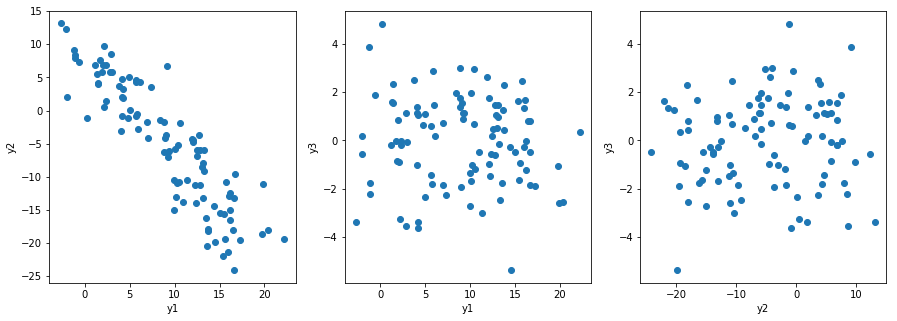

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(df.y1, df.y2)
plt.xlabel('y1')
plt.ylabel('y2')
plt.subplot(132)
plt.scatter(df.y1, df.y3)
plt.xlabel('y1')
plt.ylabel('y3')
plt.subplot(133)
plt.scatter(df.y2, df.y3)
plt.xlabel('y2')
plt.ylabel('y3')

Mais uma vez, confirmamos as conclusões feitas a partir dos coeficientes de correlação.

## Regressão linear simples
A análise de regressão estuda a relação entre uma variável chamada a variável dependente e outras variáveis chamadas variáveis independentes.

A relação entre elas é representada por um modelo matemático, que associa a variável dependente com as variáveis independentes. 

Este modelo é chamado de modelo de regressão linear simples (MRLS) se define uma relação linear entre a variável dependente e uma variável independente. Em termos matemáticos, dizemos que a variável dependente $y$ depende de $x$ de acordo com a equação linear
$$y = \alpha x + \beta + \epsilon$$

onde $\alpha$ é chamado de coeficiente angular, $\beta$ de coeficiente de interceptação e $\epsilon$ de ruído. 

O ruído $\epsilon$ parace na equação para representar a componente aleatória da relação entre $y$ e $x$. Em sistemas reais, não existem relações perfeitamente lineares e determinísticas.

Em regressão linear simples, temos o objetivo de encontrar os valores de $\alpha$ e $\beta$ que melhor se ajustam aos pares $(x, y)$.

Para criar modelos de regressão linear, utilizaremos o pacote ```sklearn.linear_model```, importando a classe ```LinearRegression```.

In [5]:
from sklearn.linear_model import LinearRegression

Faremos o ajuste da função aos dados utilizando o comando ```LinearRegression().fit()```. O comando ```fit()``` recebe como parâmetro os valores da variável independente (no nosso caso o $x$) e os valores da variável independente (usaremos o $y_1$). 

Os valores da variável independente devem estar no formato de vetor coluna. Quando acessamos os valores de uma coluna do dataframe, as informações são organizadas como um vetor linha. Para modificar a forma de linha para coluna, utilizamos o comando ```DataFrame.nome_da_coluna.values.reshape(-1, 1)```. 

In [6]:
reg = LinearRegression().fit(df.x.values.reshape(-1, 1), df.y1)

Guardamos o modelo ajustado em uma variável denominada ```reg```. Para recuperar os valores $\alpha$ e $\beta$, utilizamos os comandos ```reg.coef_``` e ```reg.intercept_```, respectivamente.

In [7]:
print(reg.coef_)
print(reg.intercept_)

[1.90577439]
-0.5309126093874603


Sabemos agora, que a equação da reta criada na regressão é definida como $y_1 = 1.905x - 0.53$. 

Uma vez criado o modelo, é possível fazer previsões de valore $y_1$ para um valor específico $x$. Para isso, utilizamos o comando ```reg.predict()```. Como parâmetro para o comando, passamos o valor de $x$ na forma de coluna.

In [8]:
reg.predict([[10]])

array([18.52683125])

Faremos a plotagem da função linear em cima do gráfico de dispersão para verificar se o modelo foi criado corretamente.

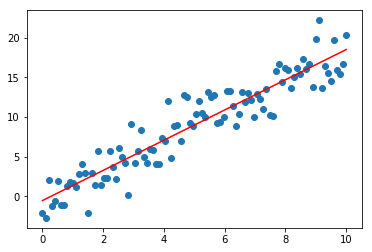

In [16]:
X = df.x.values
y1 = df.y1.values

plt.scatter(X, y1)
plt.plot(X, reg.predict(X.reshape(-1, 1)), color='red')

## Coeficiente de determinação ($R^2$)

O coeficiente de determinação é a proporção da variância na variável dependente que é previsível pela variável independente. 

Se $\bar{y}$ é a média das observações:

* $\bar{y}=\frac {1}{n}\sum _{i=1}^{n}y_{i}$

então $R^2$ pode ser mensurado utilizando as somas:

* Soma total dos quadrados (proporcional a variância dos dados):

${\displaystyle SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}$

* Soma dos quadrados da regressão:

${\displaystyle SS_{\text{reg}}=\sum _{i}(f_{i}-{\bar {y}})^{2}}$

* Coeficiente de determinação:

${\displaystyle R^{2} = {SS_{\rm {reg}} \over SS_{\rm {tot}}}\,}$

Quanto mais próximo de 1 o valor de $R^2$ estiver, melhor é o ajuste. Para acessar o valor de $R^2$, utilizamos o comando ```score()```, passando os mesmos parâmetros do comando ```fit()```.

In [20]:
reg.score(X.reshape(-1, 1), y1)

0.8802798498240479